In [ ]:
!git clone https://github.com/D111sP/test_api

Cloning into 'test_api'...
remote: Enumerating objects: 6682, done.
remote: Counting objects: 100% (6682/6682), done.
remote: Compressing objects: 100% (6681/6681), done.
remote: Total 6682 (delta 4), reused 6679 (delta 1), pack-reused 0
Receiving objects: 100% (6682/6682), 5.37 MiB | 10.67 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

import multiprocessing
import os
from random import shuffle
from typing import Tuple, Optional, List

import cv2
import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.models import Functional
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Размеры изображения
img_width, img_height = 80, 30
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dense(100))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
def _provide_data(for_train_percent, num_of_threads: Optional[int] = 4):
  paths_to_images = []

  for el in range(0, 10):
    paths_to_images.extend(f'/content/test_api/img_base_create/base/80x30/{el}/{image_name}' for image_name in os.listdir(f'/content/test_api/img_base_create/base/80x30/{el}'))

  shuffle(paths_to_images)

  size = len(paths_to_images)
  train_size = int(size * for_train_percent / 100)
  test_size = size - train_size
  chunk_size = size // num_of_threads

  manager = multiprocessing.Manager()
  data = manager.list()
  processes = []
  for i in range(chunk_size):
      start = i * chunk_size
      stop = (i + 1) * chunk_size
      process = multiprocessing.Process(target=_provide_images, args=(paths_to_images[start:stop], data))
      processes.append(process)
      process.start()

  for process in processes:
      process.join()


  all_images = [value[0]/255 for value in data]
  all_labels = [value[1] for value in data]
  x_train, y_train = all_images[:train_size], all_labels[:train_size]
  x_test, y_test = all_images[-test_size:], all_labels[-test_size:]
  return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [ ]:
def _provide_images(paths_to_image: List[str], all_images: List[Tuple[np.ndarray, np.ndarray]]) -> None:
  for path_to_image in paths_to_image:
      digit = int(path_to_image.split('/')[-2])
      digit_vectorize = np.zeros(shape=(10,))
      digit_vectorize[digit] = 1

      img = cv2.imread(path_to_image)
      all_images.append((img, digit_vectorize))

In [ ]:
x_train, y_train, x_test, y_test = _provide_data(for_train_percent=80)

In [ ]:
yy_train = y_train.copy()
xx_train =x_train.copy()

In [ ]:
yyy_train = np.asarray(yy_train).astype('float32').reshape((3571,-1))
print(len(yyy_train))
xxx_train =xx_train.copy()

3571


# Новый раздел

In [ ]:
model.fit(xxx_train,
          yyy_train,
          epochs=40,
          batch_size = 64)

Epoch 1/40
56/56 [==============================] - 9s 17ms/step - loss: 2.0584 - accuracy: 0.2616
Epoch 2/40
56/56 [==============================] - 0s 6ms/step - loss: 1.2143 - accuracy: 0.5906
Epoch 3/40
56/56 [==============================] - 0s 8ms/step - loss: 0.8709 - accuracy: 0.7085
Epoch 4/40
56/56 [==============================] - 1s 10ms/step - loss: 0.6861 - accuracy: 0.7709
Epoch 5/40
56/56 [==============================] - 0s 8ms/step - loss: 0.5969 - accuracy: 0.8034
Epoch 6/40
56/56 [==============================] - 0s 7ms/step - loss: 0.4913 - accuracy: 0.8446
Epoch 7/40
56/56 [==============================] - 0s 6ms/step - loss: 0.4501 - accuracy: 0.8563
Epoch 8/40
56/56 [==============================] - 0s 6ms/step - loss: 0.3722 - accuracy: 0.8813
Epoch 9/40
56/56 [==============================] - 0s 7ms/step - loss: 0.3391 - accuracy: 0.8866
Epoch 10/40
56/56 [==============================] - 0s 6ms/step - loss: 0.3144 - accuracy: 0.8964
Epoch 11/40
56/56

In [ ]:
model.evaluate(x_test, y_test)

28/28 [==============================] - 0s 6ms/step - loss: 0.4240 - accuracy: 0.9127


[0.4239814877510071, 0.9126539826393127]

In [ ]:
model.save("model_80x30_loss_0.11_acc_0.97.h5")

[[1.4057485e-04 5.2234129e-04 1.3198832e-07 2.7163562e-04 9.9998057e-01
  1.2586021e-03 3.1810498e-03 1.0841107e-05 1.5570697e-02 8.2858488e-02]]
Что увидел робот:4
Что на самом деле:4


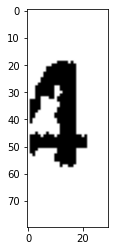

In [ ]:
n = 136

x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f"Что увидел робот:{np.argmax(res)}")
print(f"Что на самом деле:{np.argmax(y_test[n])}" )
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()